In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
dft = pd.read_csv('./data/test.csv')
dft.head(3)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q

In [3]:
dfr = pd.read_csv('./data/train.csv')
dfr.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [4]:
dfr = dfr.drop('Survived',axis=1)
df = dfr.append(dft)
df.shape

(1309, 11)

In [6]:
df['Cabin_1'] = df['Cabin'].str.extract('([A-Z]*)', expand=True)
df.head(3)

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   

  Cabin_1  
0     NaN  
1       C  
2     NaN

In [7]:
df['Cabin_1'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

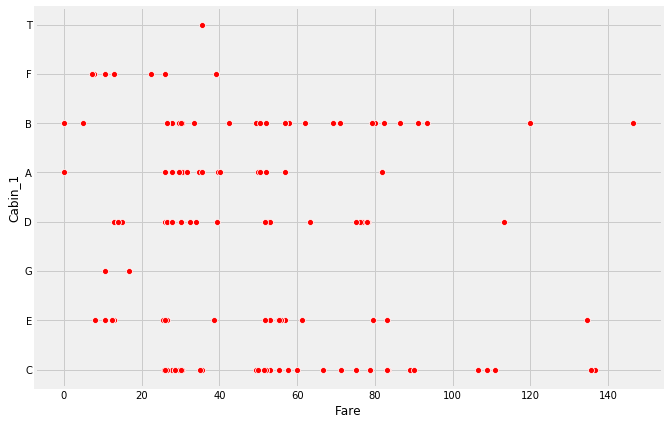

In [35]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Fare', y='Cabin_1', color='red',data=df[df['Fare']<150])

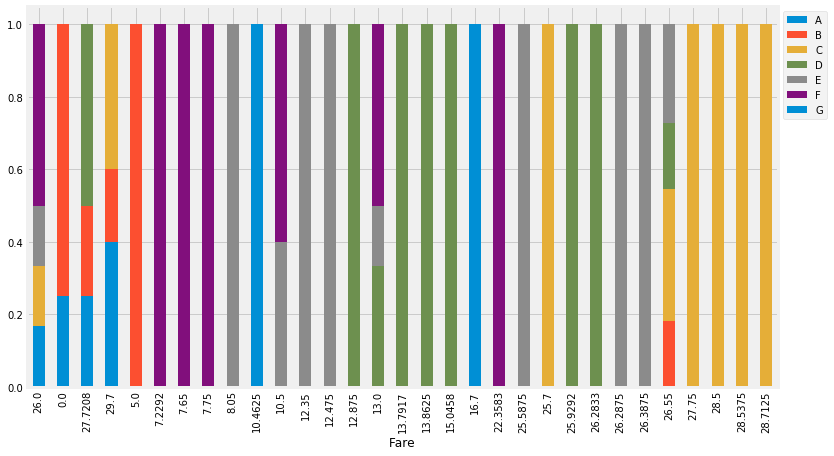

In [53]:
df11 = df[df['Fare']<30].groupby("Fare")['Cabin_1'].value_counts(normalize=True).unstack()
df11.sort_values(by=df11.columns[0]).plot(kind='bar', stacked='True', figsize=(12,7), legend=False )
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

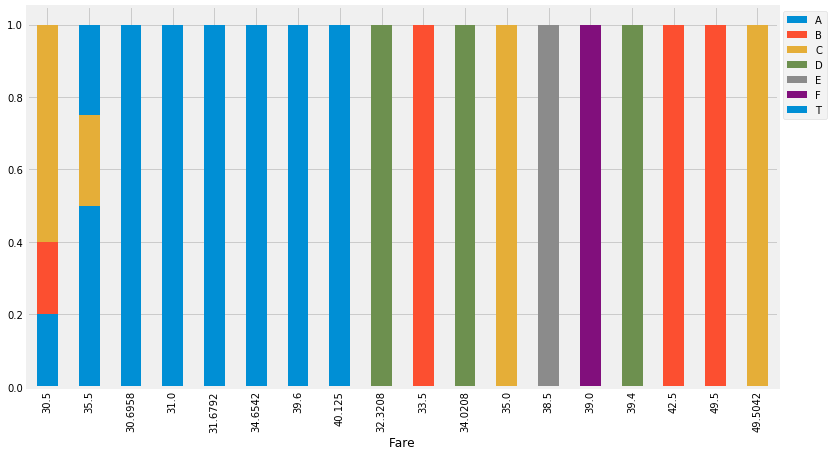

In [54]:
df11 = df[(df['Fare']<50) & (df['Fare']>30)].groupby("Fare")['Cabin_1'].value_counts(normalize=True).unstack()
df11.sort_values(by=df11.columns[0]).plot(kind='bar', stacked='True', figsize=(12,7), legend=False )
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

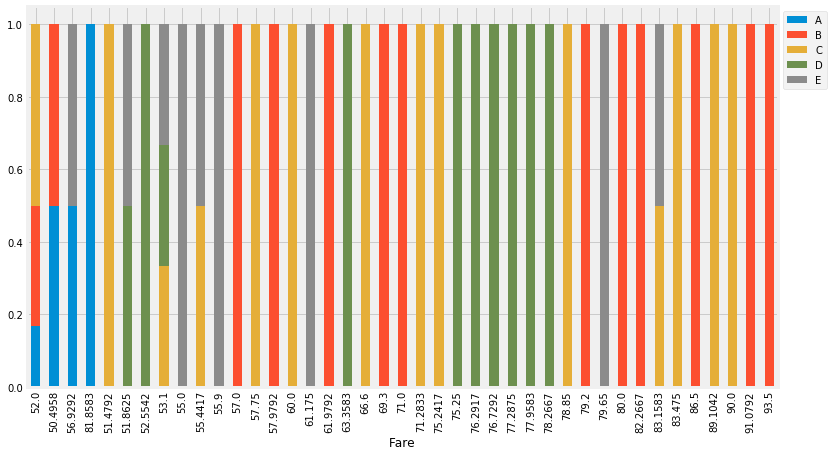

In [47]:
df11 = df[(df['Fare']<100) & (df['Fare']>50) ].groupby("Fare")['Cabin_1'].value_counts(normalize=True).unstack()
df11.sort_values(by=df11.columns[0]).plot(kind='bar', stacked='True', figsize=(12,7), legend=False )
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

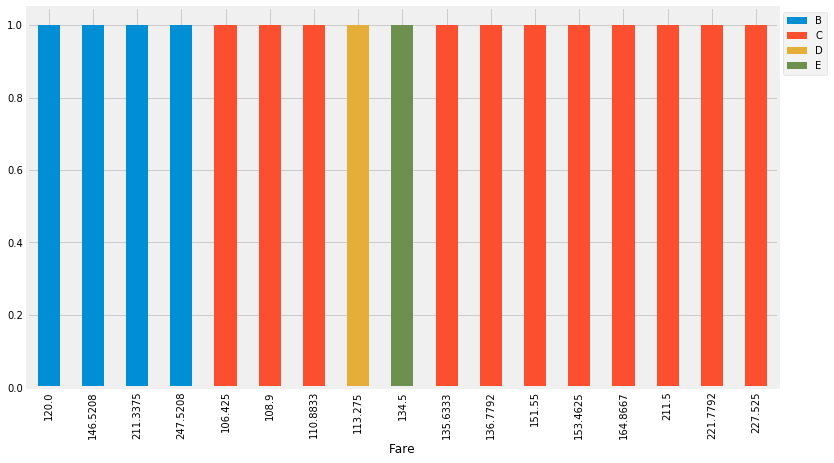

In [51]:
df11 = df[(df['Fare']<250) & (df['Fare']>100) ].groupby("Fare")['Cabin_1'].value_counts(normalize=True).unstack()
df11.sort_values(by=df11.columns[0]).plot(kind='bar', stacked='True', figsize=(12,7), legend=False )
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

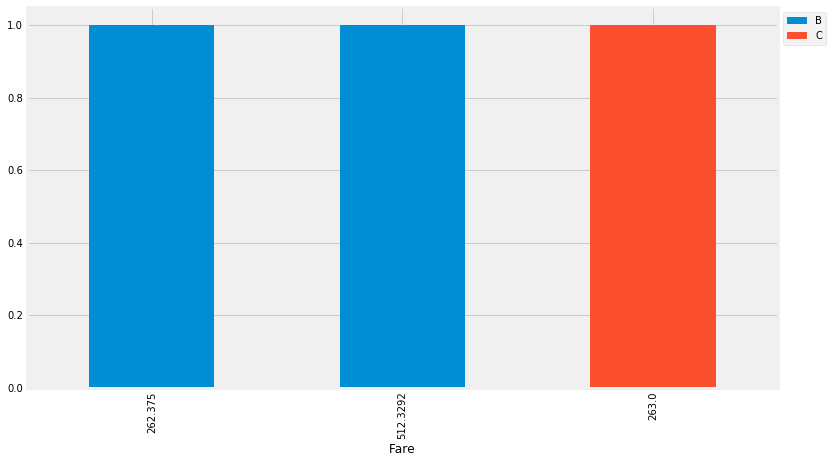

In [55]:
df11 = df[df['Fare']>250].groupby("Fare")['Cabin_1'].value_counts(normalize=True).unstack()
df11.sort_values(by=df11.columns[0]).plot(kind='bar', stacked='True', figsize=(12,7), legend=False )
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [ ]:
df11 = df[(df['Fare']<100) & (df['Fare']>50) ].groupby("Fare")['Cabin_1'].value_counts(normalize=True).unstack()
df11.sort_values(by=df11.columns[0]).plot(kind='bar', stacked='True', figsize=(12,7), legend=False )
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [9]:
df[df['Cabin_1']=='A']['Fare'].agg(['min','max','median','mean'])

min        0.000000
max       81.858300
median    35.077100
mean      41.244314
Name: Fare, dtype: float64

In [10]:
df[df['Cabin_1']=='B']['Fare'].agg(['min','max','median','mean'])

min         0.000000
max       512.329200
median     82.266700
mean      122.383078
Name: Fare, dtype: float64

In [11]:
df[df['Cabin_1']=='C']['Fare'].agg(['min','max','median','mean'])

min        25.700000
max       263.000000
median     86.289600
mean      107.926598
Name: Fare, dtype: float64

In [12]:
df[df['Cabin_1']=='D']['Fare'].agg(['min','max','median','mean'])

min        12.875000
max       113.275000
median     52.554200
mean       53.007339
Name: Fare, dtype: float64

In [13]:
df[df['Cabin_1']=='E']['Fare'].agg(['min','max','median','mean'])

min         8.050000
max       134.500000
median     53.100000
mean       54.564634
Name: Fare, dtype: float64

In [14]:
df[df['Cabin_1']=='F']['Fare'].agg(['min','max','median','mean'])

min        7.229200
max       39.000000
median    13.000000
mean      18.079367
Name: Fare, dtype: float64

In [15]:
df[df['Cabin_1']=='G']['Fare'].agg(['min','max','median','mean'])

min       10.4625
max       16.7000
median    16.7000
mean      14.2050
Name: Fare, dtype: float64

In [16]:
df[df['Cabin_1']=='T']['Fare'].agg(['min','max','median','mean'])

min       35.5
max       35.5
median    35.5
mean      35.5
Name: Fare, dtype: float64

In [59]:
df[df['Cabin'].isnull()==False]['Fare'].nunique()

112